<a href="https://colab.research.google.com/github/rishabhthakur9/project-1-DA/blob/main/21BDS0183.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dataset Shape (Rows, Columns): (569, 33)

Column Names:
 ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean          

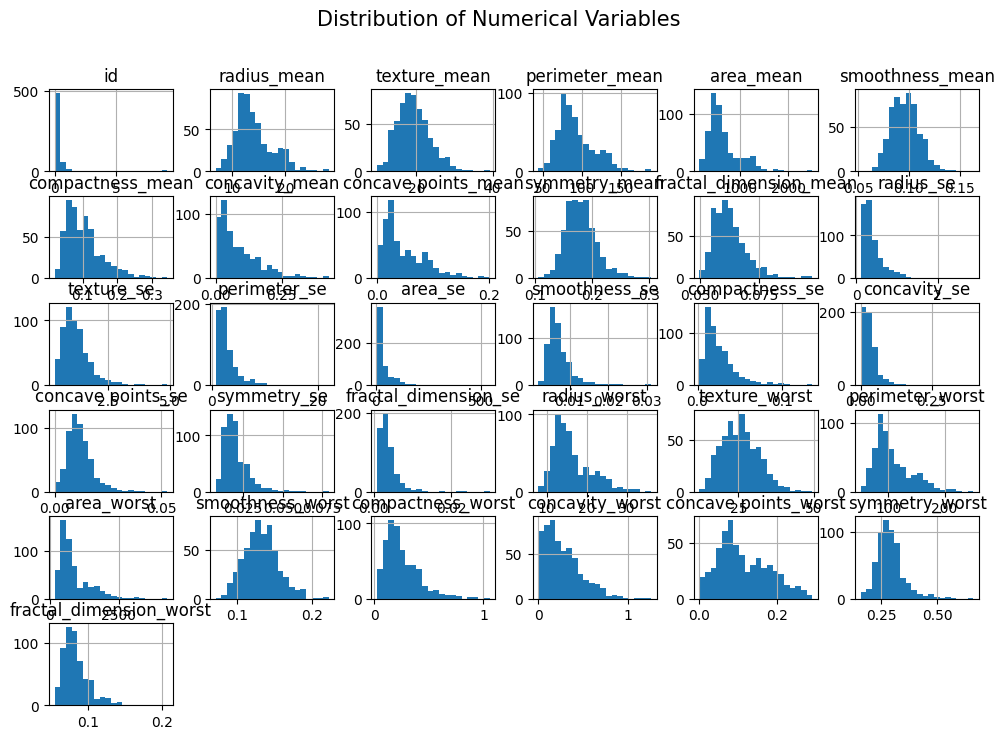

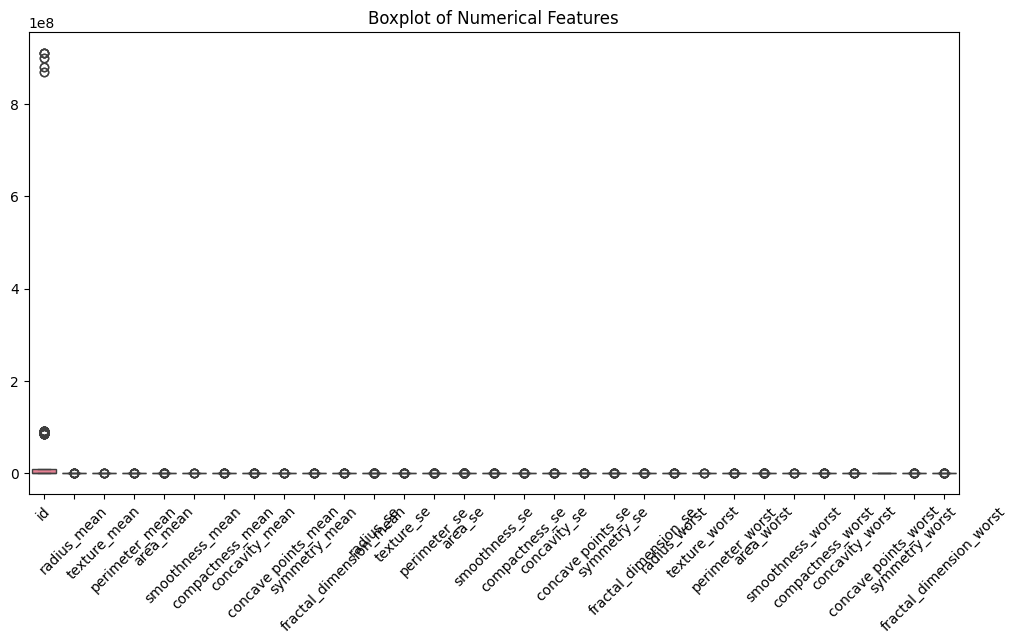


Bivariate Analysis:


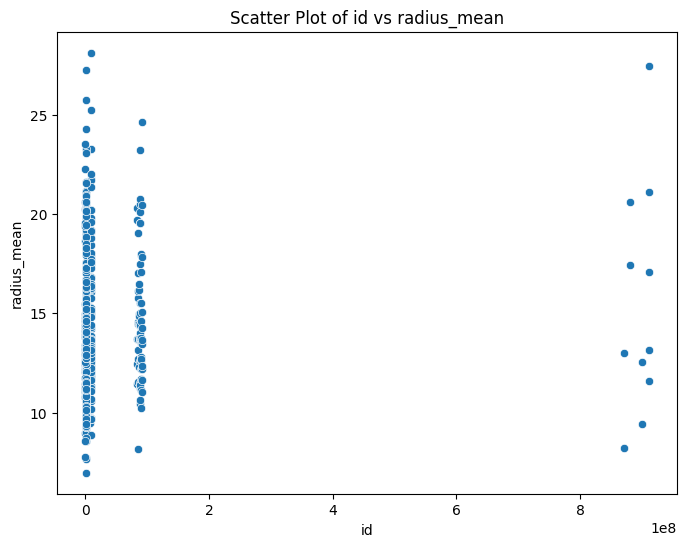

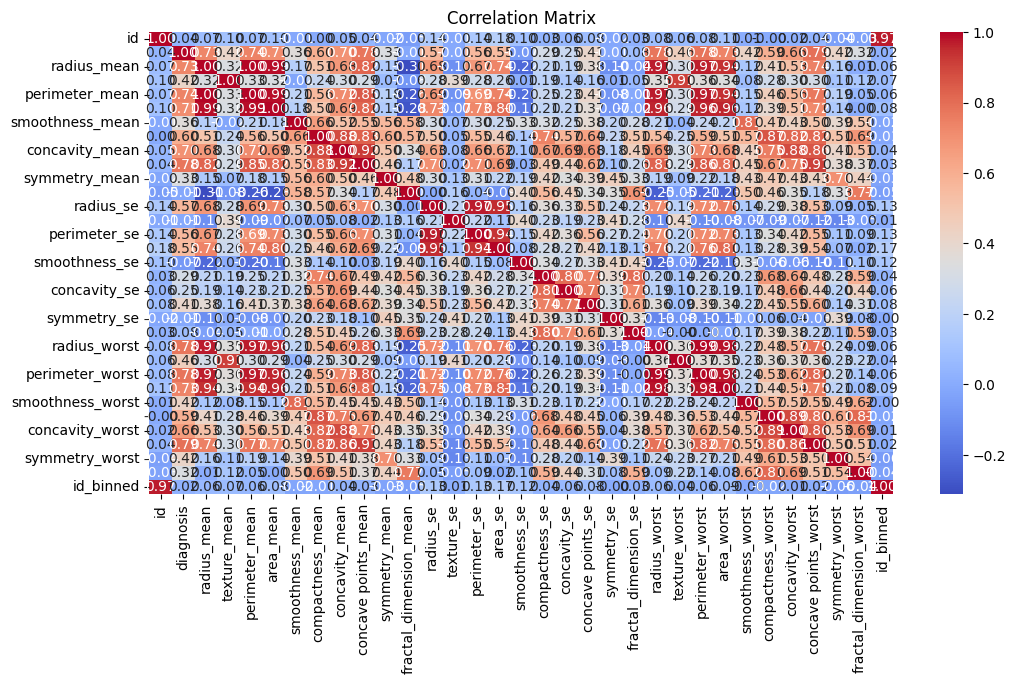


Multivariate Analysis:


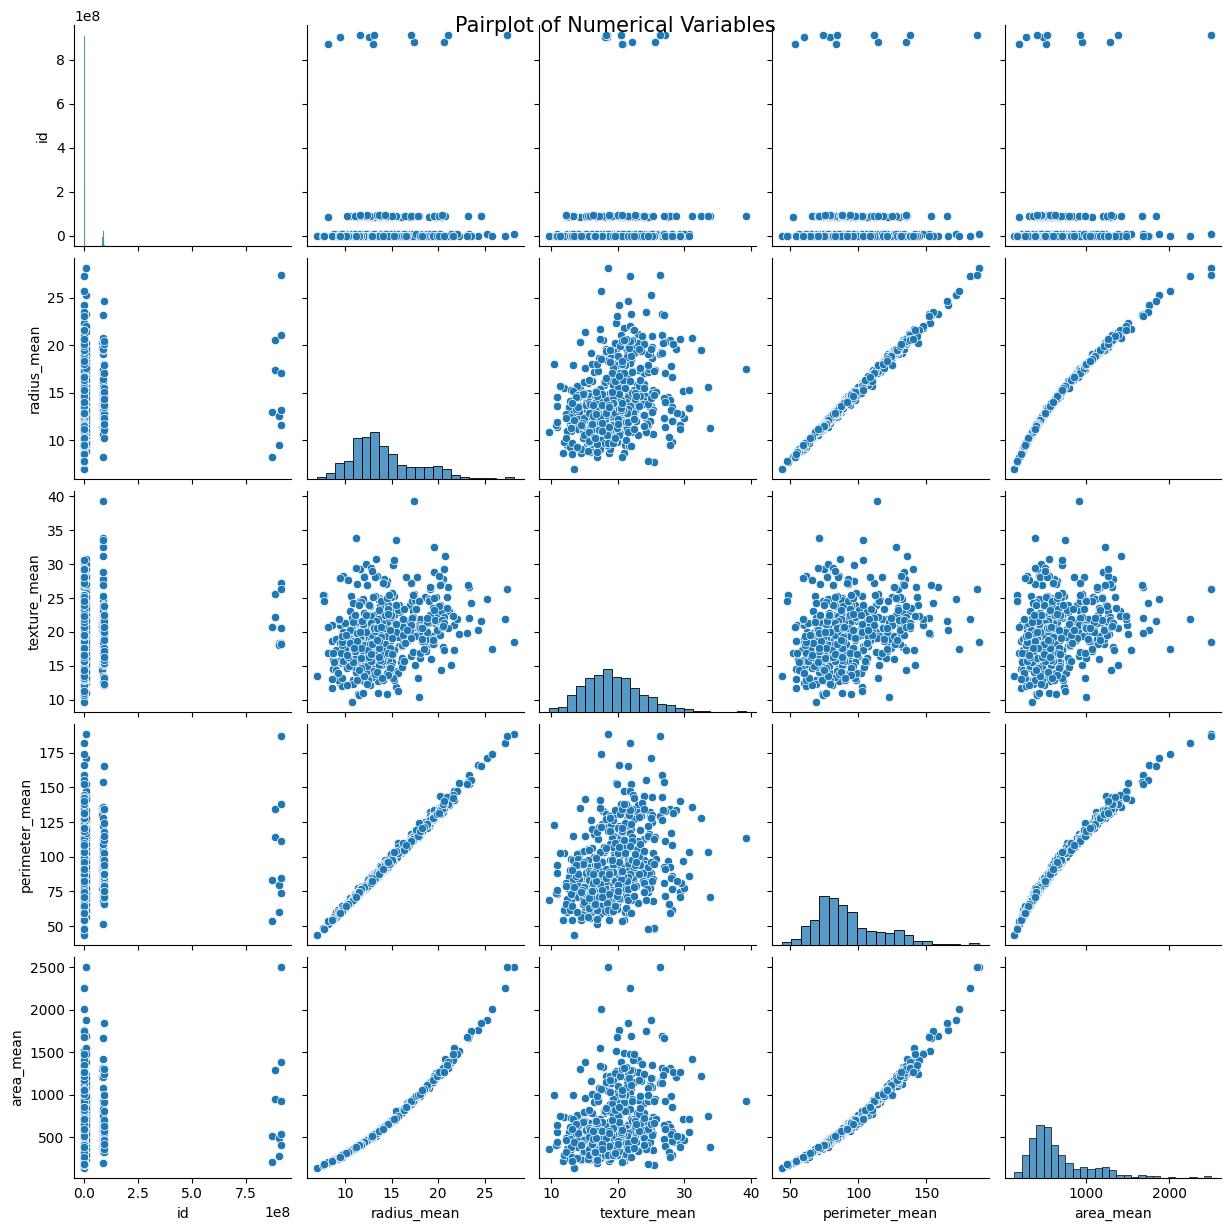

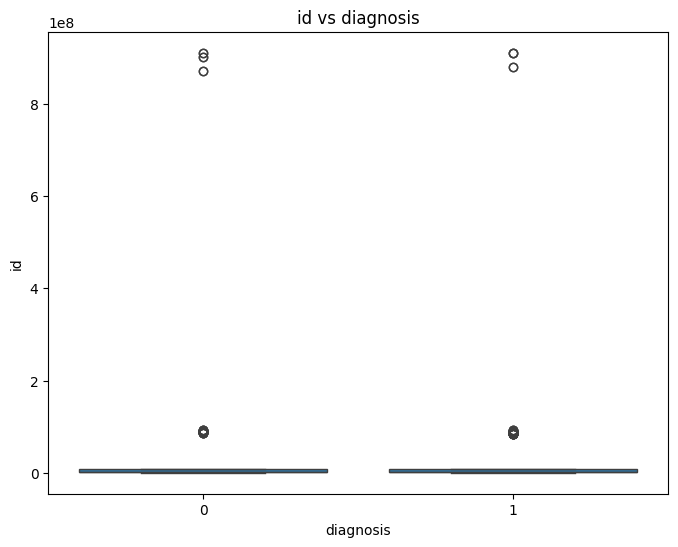

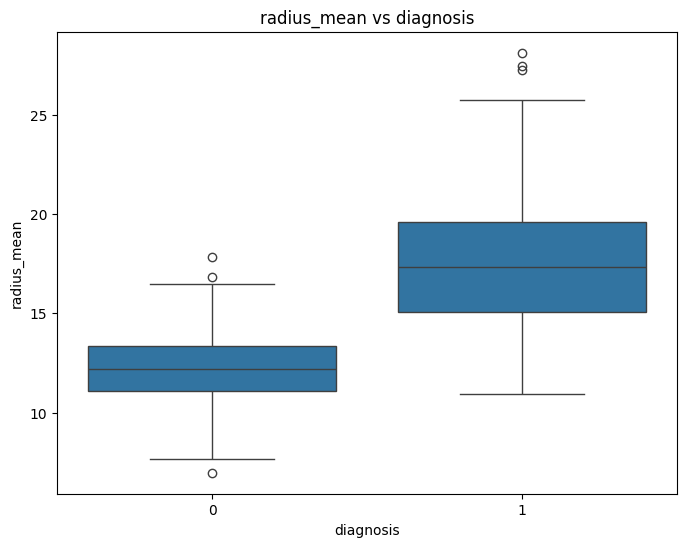

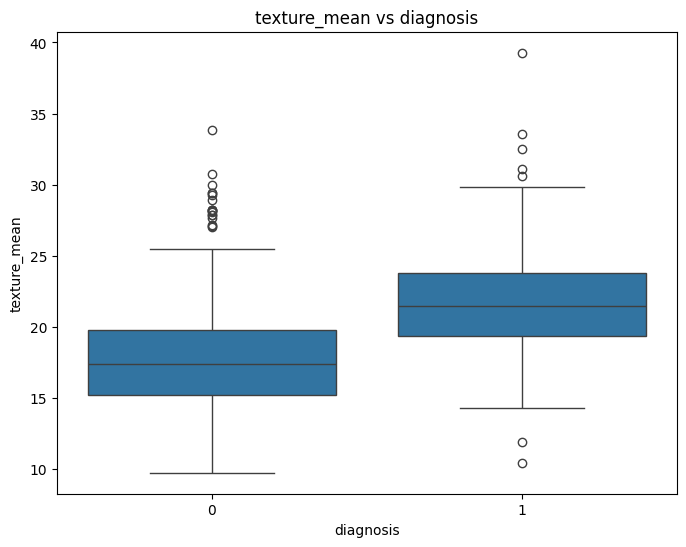


 Data Processing Completed. Cleaned dataset saved as 'cleaned_bcancer.csv'


In [ ]:
#Name - Rishabh Thakur
#Reg. No. - 21BDS0183
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bcancer.csv"
df = pd.read_csv(url)

# 1. Dataset Dimension & Exploration
print("\nDataset Shape (Rows, Columns):", df.shape)
print("\nColumn Names:\n", df.columns.tolist())

# 2. Basic Summary of the Dataset
print("\nDataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())

print("\nStatistical Summary of Numerical Columns:")
print(df.describe())

print("\nStatistical Summary of Categorical Columns:")
print(df.describe(include=['object']))

# 3. Data Cleaning & Handling
# Dropping irrelevant columns
df.drop(columns=['Unnamed: 32'], inplace=True, errors='ignore')

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# 4. Handling Missing Values
print("\nMissing Values Before Handling:\n", df.isnull().sum())

# Handling Missing Data using Mean Imputation
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

print("\nMissing Values After Handling:\n", df.isnull().sum())

# 5. Handling Duplicates
print("\nNumber of Duplicate Rows Before Removal:", df.duplicated().sum())
df = df.drop_duplicates()
print("Number of Duplicate Rows After Removal:", df.duplicated().sum())

# 6. Encoding Categorical Data
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 7. Data Transformation - Discretization (Binning)
if len(numerical_cols) > 0:
    binning = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
    df[numerical_cols[0] + "_binned"] = binning.fit_transform(df[[numerical_cols[0]]])

# 8. Exploratory Data Analysis

# Univariate Analysis
print("\nUnivariate Analysis:")

# Histogram of numerical columns
df[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribution of Numerical Variables", fontsize=15)
plt.show()

# Boxplots for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

# Bivariate Analysis
print("\nBivariate Analysis:")

# Scatter plot for first two numerical features
if len(numerical_cols) > 1:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[numerical_cols[0]], y=df[numerical_cols[1]])
    plt.xlabel(numerical_cols[0])
    plt.ylabel(numerical_cols[1])
    plt.title(f"Scatter Plot of {numerical_cols[0]} vs {numerical_cols[1]}")
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Multivariate Analysis
print("\nMultivariate Analysis:")

# Pairplot for first 5 numerical features
sns.pairplot(df[numerical_cols[:5]])  # Adjust the number of columns as needed
plt.suptitle("Pairplot of Numerical Variables", fontsize=15)
plt.show()

# Boxplots (Categorical vs Numerical)
for num_col in numerical_cols[:3]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[categorical_cols[0]], y=df[num_col])
    plt.xlabel(categorical_cols[0])
    plt.ylabel(num_col)
    plt.title(f"{num_col} vs {categorical_cols[0]}")
    plt.show()

# 9. Save the Cleaned Dataset
df.to_csv("cleaned_bcancer.csv", index=False)
print("\n Data Processing Completed. Cleaned dataset saved as 'cleaned_bcancer.csv'")
